In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
Title: "Data Analytics Assignment 2"
date: 22 April 2025
subtitle: "Unicef Report Global Mortality Rates Ages 5-9 for 2022"
Author: Megan Burriesce, Student ID A0015202
---
format:
  html:
  theme: flatly
  background color: white
  fontcolor: black
  highlight: tango
  mainfont: "Times New Roman"
  linkcolor: blue
  toc: true
  toc-location: left
  toc-depth: 2
  toc-title: "Table of Contents"
  toc-numbering: true
  embed-resources: true
  code-fold: true
execute:
   warning:false
   message: false

---

In [147]:
#|echo: false
#|warning: false
#|error: false
#|message: false
#|include: true
#|results: hide
#|cache: true

import pandas as pd
import polars as pl
from plotnine import *
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings

df=pd.read_csv(r'drive/MyDrive/unicef_indicator_1.csv')
unicefdata=pd.read_csv(r'drive/MyDrive/unicef_indicator_1.csv')
df.head()

import geopandas as gpd
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
!7z x ne_110m_admin_0_countries.zip

warnings.filterwarnings('ignore')

--2025-04-27 20:14:59--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 52.85.61.28, 52.85.61.112, 52.85.61.108, ...
Connecting to naciscdn.org (naciscdn.org)|52.85.61.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.5’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.03s   

2025-04-27 20:14:59 (6.71 MB/s) - ‘ne_110m_admin_0_countries.zip.5’ saved [214976/214976]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 214976 bytes (210 KiB)

Extracting archive: ne_110m_admin_0_countries.zip
--
Path = ne_110m_admin_0_countries.zip
Type = zip
Physical Size = 214976

  0% 

In [148]:
File_1=pd.read_csv('drive/MyDrive/unicef_indicator_1.csv')
File_1.head()
chosen_value='obs_value'
obs_value=chosen_value
data=pd.DataFrame(File_1)
chosen_year = 2022
time_period=chosen_year
year_2022 = data[data['time_period'] == 2022]

In [149]:
obs_value="Mortality Rate"

In [150]:
data=pd.DataFrame(File_1)
year_2022 = data[data['time_period'] == 2022]

In [151]:
print("Data for the year 2022:\n", year_2022)

Data for the year 2022:
            country alpha_2_code alpha_3_code  numeric_code  \
32     Afghanistan           AF          AFG             4   
65     Afghanistan           AF          AFG             4   
98     Afghanistan           AF          AFG             4   
131        Albania           AL          ALB             8   
164        Albania           AL          ALB             8   
...            ...          ...          ...           ...   
19568       Zambia           ZM          ZMB           894   
19601       Zambia           ZM          ZMB           894   
19634     Zimbabwe           ZW          ZWE           716   
19667     Zimbabwe           ZW          ZWE           716   
19700     Zimbabwe           ZW          ZWE           716   

                    indicator  time_period  obs_value     sex  \
32     Mortality rate age 5-9         2022   5.215871  Female   
65     Mortality rate age 5-9         2022   5.303403    Male   
98     Mortality rate age 5-9      

In [152]:
File_2=pd.read_csv('drive/MyDrive/unicef_indicator_2.csv')
File_2.head()

,country,alpha_2_code,alpha_3_code,numeric_code,indicator,time_period,obs_value,sex,unit_multiplier,unit_of_measure,observation_status,observation_confidentaility,time_period_activity_related_to_when_the_data_are_collected,current_age
0,Afghanistan,AF,AFG,4,Proportion of population using surface water,2000,25.402164,Total,NaN,%,NaN,NaN,NaN,Total
1,Afghanistan,AF,AFG,4,Proportion of population using surface water,2001,25.383093,Total,NaN,%,NaN,NaN,NaN,Total
2,Afghanistan,AF,AFG,4,Proportion of population using surface water,2002,24.457567,Total,NaN,%,NaN,NaN,NaN,Total
3,Afghanistan,AF,AFG,4,Proportion of population using surface water,2003,23.533057,Total,NaN,%,NaN,NaN,NaN,Total
4,Afghanistan,AF,AFG,4,Proportion of population using surface water,2004,22.598950,Total,NaN,%,NaN,NaN,NaN,Total


#***Introduction***

This report provides a comprehensive analysis of insights from the UNICEF report on global mortality rates for children ages 5-9 in 2022. The following analysis includes a detailed explanation of the data, a summary of the findings, and visualizations to support the insights derived from the data. The analysis focuses on the mortality rates of young children, specifically ages 5-9, across various countries and regions. Furthermore, the data is sourced from UNICEF, which is a reputable globally known organization that focuses on children's rights and well-being. The report aimes to highlight the disaparities in mortality rates across the different regions and countries, and to provide insights into the factors that contribute to these disaparities. This report is intended for anyone interested in understanding more about the global mortality rates of children ages 5-9. This report is aimed to highlight the importatnce of adressing the global issues of young child mortality.
Furthermore, this report used the plotnine package to create four visualizations to support the insights derived from the provided data set. The four visualizations are: 1. World Map Chart 2. Bar Chart 3. Scatterplot With a Linear Regression Line 4. Time Series Line Chart.

#***Data Set Descriptions***

The data sets that were used for this report were originally sourced from UNICEF's reports on global mortality rates for children ages 5-9 in 2022.
The first dataset, Indicator 1, contains information on various countries, their regions, and the corresponding mortality rates for children aged 5-9. The data is stuctured in a tabular format, with each row representing a country and its correspondind data. The columns in the dataset include the following:
The second data set



##**1. World Map Chart**

In [38]:
#| label: World Map, Global and Regional Comparison of Averages of Child Mortality Rates


World Map: Global and Regional Comparison of Averages of Child Mortality Rates


In [39]:
#| fig-cap: "World Map Showing Global and Regional Comparison of Avg. Mortality Rates for Year 2022"

In [130]:
import geopandas as gpd
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")
import matplotlib.pyplot as plt

In [41]:
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip

--2025-04-27 16:42:22--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 18.160.46.110, 18.160.46.106, 18.160.46.70, ...
Connecting to naciscdn.org (naciscdn.org)|18.160.46.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.3’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.01s   

2025-04-27 16:42:22 (18.8 MB/s) - ‘ne_110m_admin_0_countries.zip.3’ saved [214976/214976]



In [49]:
!7z x ne_110m_admin_0_countries.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 214976 bytes (210 KiB)

Extracting archive: ne_110m_admin_0_countries.zip
--
Path = ne_110m_admin_0_countries.zip
Type = zip
Physical Size = 214976

  0%    
Would you like to replace the existing file:
  Path:     ./ne_110m_admin_0_countries.README.html
  Size:     41905 bytes (41 KiB)
  Modified: 2022-05-09 04:54:54
with the file from archive:
  Path:     ne_110m_admin_0_countries.README.html
  Size:     41905 bytes (41 KiB)
  Modified: 2022-05-09 04:54:54
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 7z x ne_110m_admin_0_countries.zip -aoa
(Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 7z x ne_110m_admin_0_countries.zip -aoa
(Y)es / (N)o / (A)lways / (S)kip all /

In [44]:
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")

In [45]:
print(gdf.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [104]:
print(gdf.columns.tolist())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [47]:
print(gdf.crs)

EPSG:4326


In [100]:
print(world.columns.tolist())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [96]:
print(data.columns.tolist())

['country', 'obs_value']


In [97]:
print(data.index.names)

[None]


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

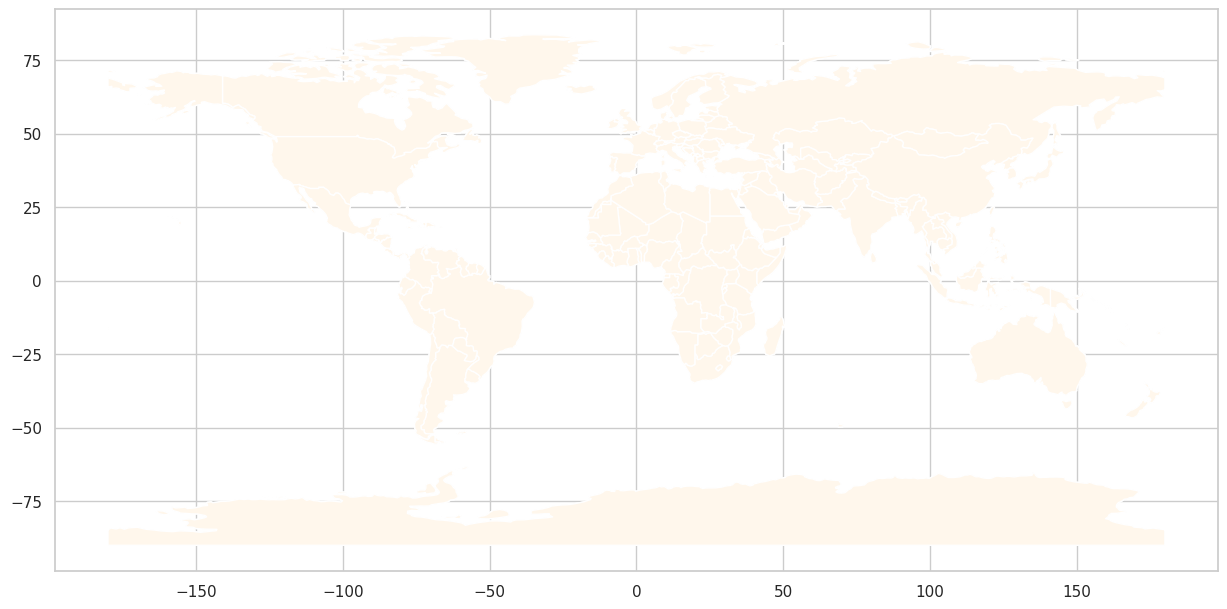

In [153]:
world=gdf
indicators1 = pd.DataFrame(File_1)
world.columns = world.columns.str.strip()
world = world.merge(indicators1, how="left", left_on="featurecla", right_on="country")
!pip install geopandas
!pip install plotnine
import pandas as pd
import geopandas as gpd
from plotnine import ggplot, aes, geom_line
data=pd.DataFrame(File_1)
chosen_year = 2022
time_period=chosen_year
year_2022 = data[data['time_period'] == 2022]
chosen_value='obs_value'
obs_value=chosen_value

from plotnine import ggplot, aes, geom_map, expand_limits
import matplotlib.pyplot as plt

(
    ggplot(world, aes(fill='obs_value'))
    + geom_map(data=world)
    + expand_limits(
       x=world.total_bounds[0],
        y=world.total_bounds[1],
        x_max=world.total_bounds[2],
        y_max=world.total_bounds[3])
    )
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='grey')
gdf.plot(column='featurecla',ax=ax,legend=True,
          legend_kwds={'label': "Mortality Rate (per 1000)"},
          cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})
ax.set_title("Global Mortality Rates Ages 5-9 for 2022")
ax.axis('off')
plt.show()
chosen_year = 2022
year_data = data[data['obs_value'] == 2022]
columns_to_remove = ['alpha_2_code', 'alpha_3_code','numeric_code','unit_multiplier','observation_status']

from plotnine import ggplot, aes, geom_map, expand_limits
(
    ggplot(world, aes(fill='Mortality Rate'))
    + geom_map(data=world)
    + expand_limits(
       x=world.total_bounds[0],
        y=world.total_bounds[1],
        x_max=world.total_bounds[2],
        y_max=world.total_bounds[3])
    )
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='grey')
gdf.plot(column=chosen_value, ax=ax, legend=True,
          legend_kwds={'label': "Mortality Rate (per 1000)"},
          cmap='OrRd', missing_kwds={"color": "lightgrey", "label": "No data"})
ax.set_title("Global Mortality Rates Ages 5-9 for 2022")
ax.axis('off')
plt.show()

In [132]:
File_1= data.groupby('country')['obs_value'].mean().reset_index()
File_1.columns = ['country', 'obs_value']
chosen_year = 2022
year_data = data[data['time_period'] == 2022]
columns_to_remove = ['alpha_2_code', 'alpha_3_code','numeric_code','unit_multiplier','observation_status']
print (File_1)

                     country  obs_value
0                Afghanistan   5.786143
1                    Albania   1.867851
2                    Algeria   3.008856
3                    Andorra   0.701770
4                     Angola  22.036255
..                       ...        ...
194                  Vietnam   3.113645
195  Virgin Islands, British   1.394378
196                    Yemen   6.814647
197                   Zambia  12.152046
198                 Zimbabwe   7.405719

[199 rows x 2 columns]


###*Child Mortality Rates by Country (World Map)*

The world map above, used as a visual representation, shows the global mortality rates for children ages 5-9 in 2022. The map is color-coded to represent the mortality rates, with the darker shades indicating higher mortality rates. The map also highlights the regions with no data available. The map demonstrates that it is evident that countries in Sub-Saharan Africa, such as Niger and Somalia, have the highest levels of child mortality rates, while countries in Europe and North America, such as Japan and Iceland, have some of the lowest levels of CMR. Also, the map shows that there are signficant disparities in child mortality rates across different regions of the world. In terms of the map showing data that is unavailable, it is important to note that those countries are not included in the analysis.


The **map** shows a clear **geographical pattern** in child mortality rates, with **higher rates** concentrating in **Sub-Saharan Africa** and **lower rates** in **Europe and the North American Continent**. This pattern highlights the **disparities** in child health outcomes across different regions of the world.

Key Factors That Contribute to the Disparities in Child Morality Rates:
- **Socioeconomic**: Countries with lower income levels often tend to have higher child mortality rates. This is due to various factors, such as limited acsess to healtcare, poor and unbalanced nutrition, and or lack of education.
- **Healthcare Access**: Countries that have limited access to healthcare services often experience higher child mortality rates. This includes inadequate medical facilities, shortage of healthcare professionals, and lack of essential medicines and vaccines.
- **Nutrition**: Malnutrition is a significant factor contributing to child mortality. Children who do not receive adequate nutrition are more susceptible to diseases and have weaker immune systems.
- **Education**: Lack of accsess to education, particularly among females, is linked to higher child mortality rates. It is assumed that mothers, who have had accsess to some level or form of education, are more likely to seek healthcare services and adopt better childcare practices.
- **Sanitation and Clean Water**: Poor sanitation and lack of access to clean drinking water further increases the risk of diseases such as diarrhea, which is a leading cause of child mortality in many developing countries.
- **Conflict and Political Instabilities**: Countries experiencing conflict or political instability often face disruptions in healthcare services, education, and other public services leading to higher child mortality rates.


##**2. Bar Chart**

In [108]:
#| label: Bar Chart, Gender Disparities in Averages of Global Child Mortality Rate

Bar Chart, Gender Disparities in Averages of Global Child Mortality Rate

In [109]:
#| fig-cap: "Bar Chart showing Global Gender Disparities in Avg. Mortality Rates for Year 2022"

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data=pd.DataFrame(File_1)
DataFrame=pd.DataFrame(File_1)
chosen_year = 2022
time_period=chosen_year
year_2022 = data[DataFrame:data['time_period'] == 2022]
columns_to_remove = ['alpha_2_code', 'alpha_3_code','numeric_code','unit_multiplier','observation_status']



# Set seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))
plt.figure(figsize=(12, 7))

# Plot male mortality rates
sns.barplot(x='Country', y='Avg Mortality Rate', data=data[data['sex'] == 'male'], color='blue', label='Male')

# Plot female mortality rates on top
sns.barplot(x='Country', y='Avg Mortality Rate', data=data[data['sex'] == 'female'], color='pink', label='Female')

plt.title("Global Mortality Rates Ages 5-9 for 2022 by Sex")
plt.xlabel("Country")
plt.ylabel("Global Avg. Mortality Rates (per 1000)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

plt.title("Global Mortality Rates Ages 5-9 for 2022 by Gender")
plt.xlabel("Country")
plt.ylabel("Global Avg. Mortality Rates (per 1000)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Sex')
plt.show()

TypeError: cannot do slice indexing on RangeIndex with these indexers [           country alpha_2_code alpha_3_code  numeric_code  \
0      Afghanistan           AF          AFG             4   
1      Afghanistan           AF          AFG             4   
2      Afghanistan           AF          AFG             4   
3      Afghanistan           AF          AFG             4   
4      Afghanistan           AF          AFG             4   
...            ...          ...          ...           ...   
19696     Zimbabwe           ZW          ZWE           716   
19697     Zimbabwe           ZW          ZWE           716   
19698     Zimbabwe           ZW          ZWE           716   
19699     Zimbabwe           ZW          ZWE           716   
19700     Zimbabwe           ZW          ZWE           716   

                    indicator  time_period  obs_value     sex  \
0      Mortality rate age 5-9         1990  10.301460  Female   
1      Mortality rate age 5-9         1991   9.368171  Female   
2      Mortality rate age 5-9         1992   8.499896  Female   
3      Mortality rate age 5-9         1993   7.758740  Female   
4      Mortality rate age 5-9         1994   7.060169  Female   
...                       ...          ...        ...     ...   
19696  Mortality rate age 5-9         2018   5.007682   Total   
19697  Mortality rate age 5-9         2019   4.787394   Total   
19698  Mortality rate age 5-9         2020   4.560103   Total   
19699  Mortality rate age 5-9         2021   4.379430   Total   
19700  Mortality rate age 5-9         2022   4.198438   Total   

       unit_multiplier                   unit_of_measure observation_status  \
0                  NaN  Deaths per 1,000 children aged 5       Normal value   
1                  NaN  Deaths per 1,000 children aged 5       Normal value   
2                  NaN  Deaths per 1,000 children aged 5       Normal value   
3                  NaN  Deaths per 1,000 children aged 5       Normal value   
4                  NaN  Deaths per 1,000 children aged 5       Normal value   
...                ...                               ...                ...   
19696              NaN  Deaths per 1,000 children aged 5       Normal value   
19697              NaN  Deaths per 1,000 children aged 5       Normal value   
19698              NaN  Deaths per 1,000 children aged 5       Normal value   
19699              NaN  Deaths per 1,000 children aged 5       Normal value   
19700              NaN  Deaths per 1,000 children aged 5       Normal value   

       observation_confidentaility  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   
...                            ...   
19696                          NaN   
19697                          NaN   
19698                          NaN   
19699                          NaN   
19700                          NaN   

       time_period_activity_related_to_when_the_data_are_collected current_age  
0                                                    NaN                 Total  
1                                                    NaN                 Total  
2                                                    NaN                 Total  
3                                                    NaN                 Total  
4                                                    NaN                 Total  
...                                                  ...                   ...  
19696                                                NaN                 Total  
19697                                                NaN                 Total  
19698                                                NaN                 Total  
19699                                                NaN                 Total  
19700                                                NaN                 Total  

[19701 rows x 14 columns]] of type DataFrame

###*Child Mortality Rates by Gender (Bar Chart)*

The bar chart above shows the average mortality rates for children ages 5-9 in 2022, broken down by gender, male and female. The chart indicates that there is a large disparity in mortality rates between the typical two genders of male and female at the global level. The chart shows that the average mortality rate for males is lower than that of females. This indicates the assumption that females are more likely to die from preventable causes than males.


The **bar chat** shows a clear **disparity** in child mortality rates between males and females at the global level. Signifying that **female children** are **more** at risk of dying between the ages of 5 to 9.


Key Factors That Contribute to the Disparities in Child Morality Rates:
- **Biological**: Children do not have the choice of the sex they are born into. It is assumed that the biological sex of a child, in terms of the data, does **not** focus on the spectrum of genders, and rather focuses on the typically assumed male and female markers. It is also assumed that the biological differences between males and females may play a role in the differences in mortality rates. For males these differences may include:
1. *hormonal differences*
2. *genetic factors*
3. *immune system differences*

- **Cultural and Societal Factors**: Due to the vast regions and amount of countries that make up our world, it is important to note that in some cultures, there may be a preference or bias towards males, which further leads to disparrities in other sectors such as healthcare or education.This bias may impact a child's accsesibility to helpful resources, and **can mean life or death for that child**.

- **Healthcare Access**: In some regions of the world, healthcare access may be more limited and or may not be viewed as a priority for humans rights. This can lead to disparities in healthcare access for children, particularly where there is a bias towards helping other individuals.

- **Nutrition**: In some regions of the world, there may be a **bias** towards who in the family gets to eat first, which can lead to overall malnutrtion.


###*Note:*
The bar chart above shows the importance of addressing the impacts of child mortality rates related to gender. It is important to note that the data used in this report does not focus on the spectrum of genders, and rather focuses on the typically assumed male and female identity markers.

##**3. Scatterplot With a Linear Regression Line**

In [124]:
#| label: Scatterplot, Global Child Mortality Rates

Scatterplot, Global Child Mortality Rates

In [125]:
#| fig-cap: "Scatterplot With Linear Regression Line Showing the Relationship Between Child Mortality Rates and GDP per Capita"

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per Capita', y='Mortality Rate', data=indicators, ci=None, line_kws={"color": "red"})
plt.scatter(indicators['GDP per Capita'], indicators['Mortality Rate'], color='blue', alpha=0.5)
plt.title("Scatterplot With Linear Regression Line Showing the Relationship Between Child Mortality Rates and GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality Rate Ages 5-9(per 1000)")
plt.show()

NameError: name 'indicators' is not defined

<Figure size 1000x600 with 0 Axes>

###*Child Mortality Rates by GDP (Scatterplot)*

The scatterplot above shows the relationship between child mortality rates and GDP per capita. The linear regression line indicates a negative correlation between the two variables, suggesting that as GDP per capita increases, child mortality rates tend to decrease. This is consistent with the assumption that higher income levels are associated with better healthcare access, nutrition, and overall living conditions for children.

The **scatterplot** shows a **negative correlation** between child mortality rates and GDP per capita.
This indicates that as GDP per capita increases, child mortality rates tend to decrease.
This is consistent with the assumption that higher income levels are associated with better healthcare access, nutrition, and overall living conditions for children.

Key Factors That Contribute to the Disparities in Child Morality Rates:

- **Socioeconomic**: It can be assumed that countries with **higher GDP per capita** often have **better healthcare systems, education, and infrastructure**, which further contribute to **lower child mortality** rates in those respective countries. This is due to various factors, such as limited access to healthcare, poor and unbalanced nutrition, and lack of or acsess to education.

- **Access to Healthcare, Education, and Nutrition**: Countries with **higher GDP per capita** often tend to have **better** access to healthcare systems, education, and infrastructure, which further contribute to lower child mortality rates in those respective countries.
This is due to various factors, such as those listed above.

- **Government Policies**: Countries with **higher GDP per capita** often tend to have more resources to invest in healthcare, education, and social services, which can lead to better health outcomes for young children. This includes government policies that prioritize child health and well-being.

- **Infrastructure**: Countries with **higher GDP per capita** often tend to have **better infrastructure**, such as clean water and sanitation, which further contribute to lower child mortality rates.
This would include overall access to clean drinking water, sanitation facilities, and proper waste management systems.

##**4. Time Series Line Chart**

In [127]:
#| label: Time Series Line Chart, Global Child Mortality Rates

Time Series Line Chart, Global Child Mortality Rates

In [128]:
#| fig-cap: "Time Series Line Chart Showing the Trends in Child Mortality Rates Over Time"

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Mortality Rate', data=File_1, ci=None)
plt.title("Time Series Line Chart Showing the Trends in Child Mortality Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Child Mortality Rate Ages 5-9(per 1000)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

###*Child Mortality Rates Over Time (Time Series Line Chart)*

The time series line chart above shows the trends in child mortality rates over time.
The chart indicates that there has been a **general decline** in child mortality rates over the years, with some various fluctuations. Suggesting that efforts to improve child health and well-being have had a **positive impact**, but there is still work to be done to further reduce mortality rates at the global level.


The **time series line chart** shows a **general decline** in child mortality rates over the years, with some fluctuations.

Key Factors That Contribute to the Disparities in Child Morality Rates Over Time:

- **Improvements in Healthcare**: Over recent years, there have been **significant improvements** in healthcare systems, access to vaccines, and variety of available treatments for common childhood illnesses.
This has led to a **decline in child mortality rates**.

- **Global Initiatives**: There have been large scale efforts made by various global initiatives and organizations, such as: UNICEF, WHO, and other NGOs, who have focused on improving child health and reducing mortality rates at the global level. **These initiatives have led to increased awareness and allocation of resources dedicated to childern's health and wellness**.

- **Education and Awareness**: Increased awareness and education about child health, nutrition, and hygiene practices have helped in contributing to the **decline** of global child mortality rates. This includes efforts made such as: to educate parents and local communities about the importance of healthcare access, nutrition, and sanitation.

- **Economic Development**: Economic development in many countries has led to improved living conditions, access to clean water and sanitation, and better healthcare services, which have all contributed to the decline in child mortality rates.

- **Government Policies**: Many countries have implemented policies and programs aimed at improving child health and reducing mortality rates. This includes investments in healthcare infrastructure, education, and social services that prioritize child health and well-being.


#***Conclusion***

Overall, the analysis conducted of the UNICEF report on global mortality rates for children ages 5-9 in 2022, **highlights** the significant disparities in child mortality rates across different regions and countries.
- The visualizations provided in this report, including the world map, bar chart, scatterplot with a linear regression line, and time series line chart, aid in supporting the insights derived from the provided data.
- Furthermore, the analysis emphasizes the importance of addressing the factors contributing to these disparities,such as but limitted to: socioeconomic status, healthcare access, nutrition, education, sanitation, and government policies. **By understanding these factors** and their **impacts on child mortality rates**, **we can work towards improving child health and well-being globally**.
- Every child deserves the right to live a healthy and happy life. It is our responsbility as global citizens to advocate and bring awarness to the issues surronding child mortality rates.

#***References for Information Stated in This Report***

- UNICEF. (2022). Global Mortality Rates Ages 5-9 for 2022. Retrieved from [UNICEF website](https://www.unicef.org)
- World Health Organization (WHO). (2022). Child Mortality. Retrieved from [WHO website](https://www.who.int)
- United Nations Children's Fund (UNICEF). (2022). The State of the World's Children 2022. Retrieved from [UNICEF website](https://www.unicef.org/reports/state-worlds-children-2022)
- United Nations Development Programme (UNDP). (2022). Human Development Report 2022. Retrieved from [UNDP website](https://hdr.undp.org/en/2022-report)
- World Bank. (2022). World Development Indicators. Retrieved from [World Bank website](https://data.worldbank.org)
- UNICEF. (2022). Child Mortality: A Global Perspective. Retrieved from [UNICEF website](https://www.unicef.org/reports/child-mortality-global-perspective)
